In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.externals import joblib
import csv
from numpy import genfromtxt

/home/veruska/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
data_path = '../../data/output/normalized_data_X_75p.csv'
y_path = '../../data/output/y_75p.csv'

data = pd.read_csv(data_path)
y = pd.read_csv(y_path)
print(data.shape)
print(y.shape)
data.head()

(38848, 420)
(38848, 1)


,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,alertTypeSB_ACCIDENT,alertTypeSB_CHIT_CHAT,alertTypeSB_HAZARD,alertTypeSB_JAM,alertTypeSB_NORMAL,alertTypeSB_POLICE,alertTypeSB_ROAD_CLOSED,jamBlockTypeSB_-,jamBlockTypeSB_NORMAL,jamBlockTypeSB_ROAD_CLOSED_EVENT
0,0.118068,0.0,0.084945,0.264128,0.439400,0.010487,0.0,0.000022,0.265730,0.439267,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.118068,0.0,0.084965,0.264428,0.443488,0.014304,0.0,0.000025,0.266155,0.442922,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.118068,0.0,0.084972,0.263625,0.448606,0.018030,0.0,0.000027,0.264693,0.449731,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.118068,0.0,0.085154,0.224959,0.645498,0.185608,0.0,0.000113,0.227492,0.642973,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.118068,0.0,0.085168,0.219906,0.656973,0.195060,0.0,0.000116,0.221057,0.658349,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [3]:
len(y[y.busBunching == 1]) / len(y)

0.16935670708162792

In [4]:
# Making training and test data: 80% Training, 20% Test
random.seed(15) #to get always the same set
train_X, test_X, train_Y, test_Y = train_test_split(data, y, test_size=0.20, random_state=7)

In [5]:
def rmse_cv(model, X_train, y_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

# function to plot the RMSE vs parameter value
def plot_rmse_param(series, param_name):
    series.plot(title = "Validation Error vs " + param_name)
    plt.xlabel(param_name)
    plt.ylabel("RMSE")
    
# function to get the best RMSE and the best parameter value of the model
def best_rmse_param(series):
    best_rmse = series.min()
    best_param = series.idxmin() 
    
    return(best_rmse, best_param)

In [6]:
del data
del y

### Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarni

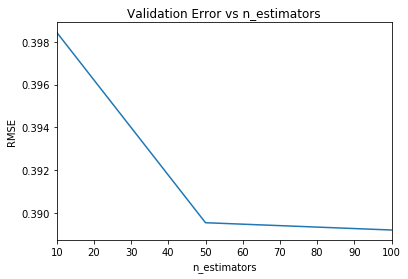

In [7]:
start = time.time()

n_estimators = [10, 50, 100] #number of trees
cv_rf_rmse = [rmse_cv(RandomForestClassifier(n_estimators = n, n_jobs=-1), train_X, train_Y).mean() 
            for n in n_estimators]

series = pd.Series(cv_rf_rmse, index = n_estimators)
plot_rmse_param(series, "n_estimators")
best_rmse_rf, best_estimator_rf = best_rmse_param(series)

/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarni

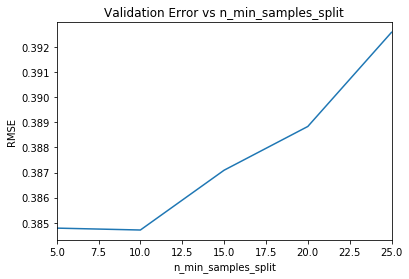

In [8]:
n_min_samples_split = [5, 10, 15, 20, 25]
cv_rf_rmse = [rmse_cv(RandomForestClassifier(n_estimators = best_estimator_rf, min_samples_split = n, n_jobs=-1), 
                      train_X, train_Y).mean() 
            for n in n_min_samples_split]

series = pd.Series(cv_rf_rmse, index = n_min_samples_split)
plot_rmse_param(series, "n_min_samples_split")
best_rmse_rf, best_split_rf = best_rmse_param(series)

/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarni

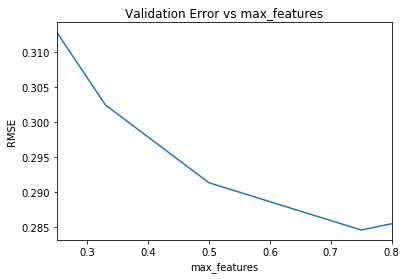

In [9]:
n_features = [0.25, 0.33, 0.5, 0.75, 0.8]
cv_rf_rmse = [rmse_cv(RandomForestClassifier(n_estimators=best_estimator_rf, min_samples_split=best_split_rf,
                                            max_features=n, n_jobs=-1), 
                      train_X, train_Y).mean() 
            for n in n_features]

series = pd.Series(cv_rf_rmse, index = n_features)
plot_rmse_param(series, "max_features")
best_rmse_rf, best_max_feat_rf = best_rmse_param(series)

In [7]:
#best_estimator_rf = 100
#best_split_rf = 5
#best_max_feat_rf = 0.75

In [10]:
print("best_estimator_rf: " + str(best_estimator_rf))
print("best_split_rf: " + str(best_split_rf))
print("best_max_features_rf: " + str(best_max_feat_rf))

best_estimator_rf: 100
best_split_rf: 10
best_max_features_rf: 0.75


In [11]:
random.seed(42)

try:
    start
except NameError: # start does not exist at all
    start = time.time()

rf = RandomForestClassifier(n_estimators=best_estimator_rf, min_samples_split=best_split_rf,
                           max_features=best_max_feat_rf, n_jobs=-1)
rf.fit(train_X, train_Y)

end = time.time()
print("Execution time: " + str((end - start)/60) + " min")

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Execution time: 2.5298197150230406 min


In [12]:
# Saving a pickle file for the model
joblib.dump(rf, 'Saved_RF_100_10_075_52p_BB_class.pkl')

['Saved_RF_100_10_075_75p_BB_class.pkl']

### Evaluating model

R2 coefficient (score) of determination is a statistical measure of how well the regression predictions approximate the real data points. The best one is 1.

In [ ]:
r2 = rf.score(test_X, test_Y)
r2

In [ ]:
print(str(r2) + " of the data is been explained by the model.")

In [13]:
pred_array = rf.predict(test_X)

In [14]:
pred_array

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
# Testing
# rf_load = joblib.load('Saved_RF_100_5_075.pkl')
# pred_array = rf_load.predict(test_X)

# removing the array of each element
pred = []
for p in pred_array:
    pred.append(p)

rmse_rf = np.sqrt(mean_squared_error(test_Y, pred))
print(rmse_rf)

In [ ]:
print(min(pred))
print(max(pred))

In [ ]:
pred

In [ ]:
test_Y

In [ ]:
alpha = y_threshold[test_Y.index]
alpha

In [ ]:
bb_pred = np.less_equal(pred, alpha)
bb_label = np.less_equal(test_Y, alpha)

In [ ]:
bb_pred

In [ ]:
bb_label

In [ ]:
pred_bb = []
for x in pred:
    if x <= 0.5:
        pred_bb.append(0)
    else:
        pred_bb.append(1)

pred_bb

In [15]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [ ]:
# Headway
accuracy = accuracy_score(bb_label, bb_pred)
precision = precision_score(bb_label, bb_pred)
recall = recall_score(bb_label, bb_pred)
f_measure = f1_score(bb_label, bb_pred)

In [16]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9234234234234234
Precision: 0.8223684210526315
Recall: 0.6830601092896175
F-measure: 0.746268656716418


### Graphs

In [ ]:
sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
ax = sns.residplot(test_Y, pred, color="g")
ax.set_title('Residuals')
ax.set_ylim([-600, 600])


In [ ]:
# Print all error to see if there is standard or some big outliers
plt.figure()
plt.plot(test_Y, pred, 'ro', ms=0.5)
# plt.ylim(10, 40)
plt.xlabel('Headway (Label)')
plt.ylabel('Predicted Headway')
plt.show()

In [ ]:
diff = test_Y - np.array(pred).flatten()
num_bins = 10
width = 5
height = 5
plt.hist(diff, num_bins, facecolor='blue', alpha=0.5, log=True)
plt.xlabel('Residual')
plt.ylabel('Total')
plt.title('Distribution of the residual (label - prediction)')
plt.rcParams["figure.figsize"] = (width,height) 
plt.show()

In [ ]:
# Features importance

#create dictionary
f_imps = {}
for i in range(len(features)):
    f_imps[features[i]] = rf.feature_importances_[i]
    
#sort dictionary 
sorted_feature_names = sorted(f_imps, key=f_imps.__getitem__, reverse=True)
sorted_values = sorted(f_imps.values(), reverse=True)

num_to_print = 20
for i in range(num_to_print):
    print("%15s %4.3f" % (sorted_feature_names[i], sorted_values[i]))

### Analysing error prediction

In [ ]:
data_test = data.loc[test_Y.index]

wrong_preds = data_test[pred != test_Y]

In [ ]:
wrong_preds

In [ ]:
# num_bins = 10
# width = 50
# height = 25
plt.hist(wrong_preds.route, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Rotas')
plt.ylabel('Total')
plt.title('Rotas que o modelo errou a predição')
# plt.xticks(np.arange(0, 500, 1))
# plt.rcParams["figure.figsize"] = (width,height)
plt.show()